In [2]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

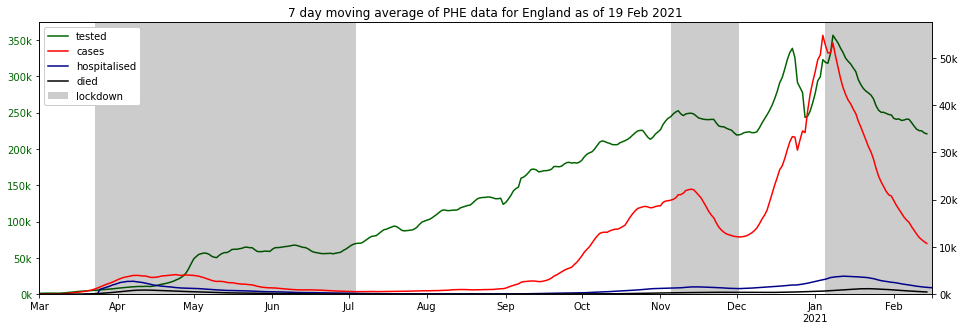

In [3]:
plot_summary(earliest_date='2020-03-01')

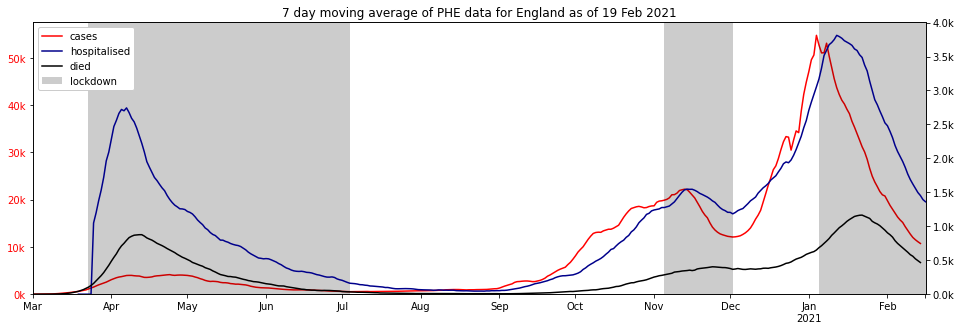

In [4]:
plot_summary(earliest_date='2020-03-01', left_series=(s.new_cases_sum,), 
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,504762.0,14214176.0,13709414.0,56286961,0.896765,24.356287,74.746947
1,Northern Ireland,N92000002,30381.0,436143.0,405762.0,1893667,1.604348,21.427315,76.968337
2,Scotland,S92000003,29015.0,1386152.0,1357137.0,5463300,0.531089,24.840975,74.627935
3,Wales,W92000004,25433.0,839065.0,813632.0,3152879,0.806660,25.806001,73.387339


'partial: 16,875,536'

'full: 589,591'

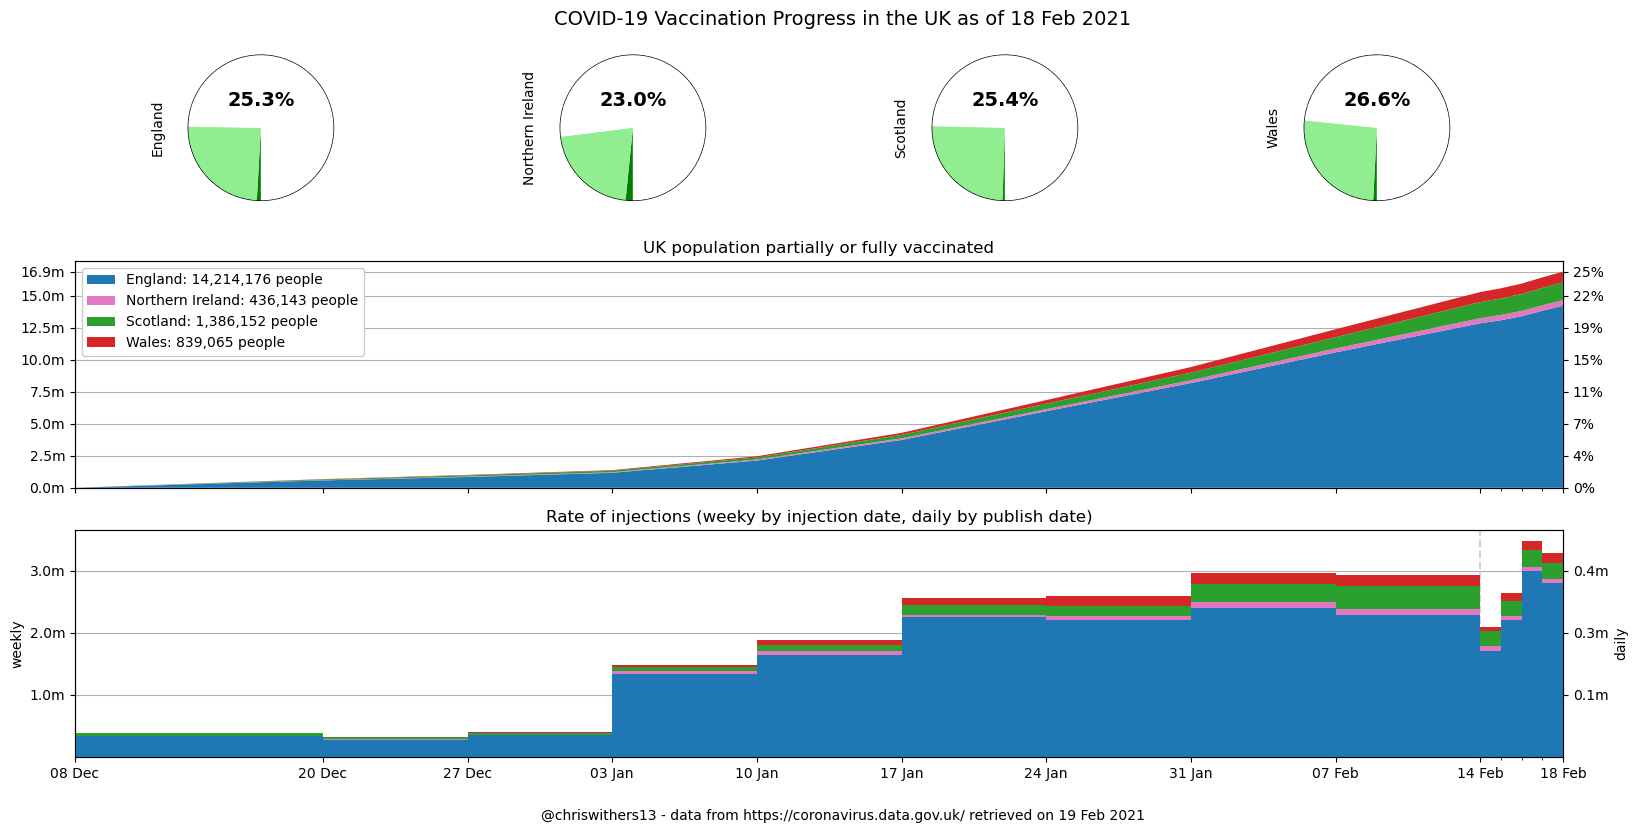

In [5]:
results = vaccination_dashboard()
display(results, f"partial: {results['any'].sum():,.0f}", f"full: {results['full'].sum():,.0f}")

In [6]:
vaccination_changes()

,,First Dose (New),Second Dose (Total),Complete (New),First Dose (Total),cumPeopleVaccinatedSecondDoseByPublishDate,Complete (Total)
,,,,,,,
England,18 Feb 21,"+396,262","+4,561","+4,561","+14,214,176","+504,762","+504,762"
Northern Ireland,18 Feb 21,"+8,574",+369,+369,"+436,143","+30,381","+30,381"
Scotland,18 Feb 21,"+31,186","+4,846","+4,846","+1,386,152","+29,015","+29,015"
Wales,18 Feb 21,"+16,432","+6,091","+6,091","+839,065","+25,433","+25,433"


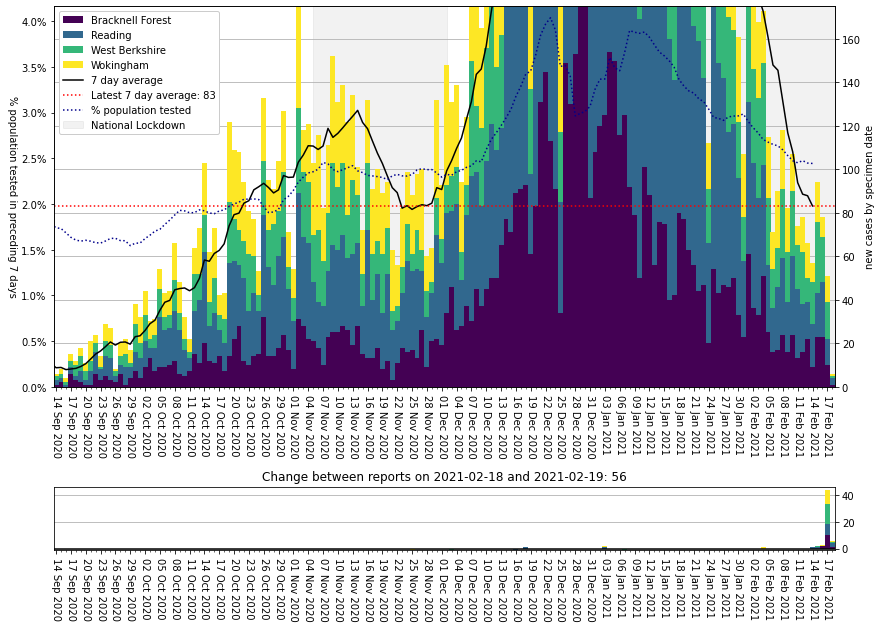

In [7]:
plot_areas(for_date, areas=my_areas, earliest='2020-09-14', ylim=175)

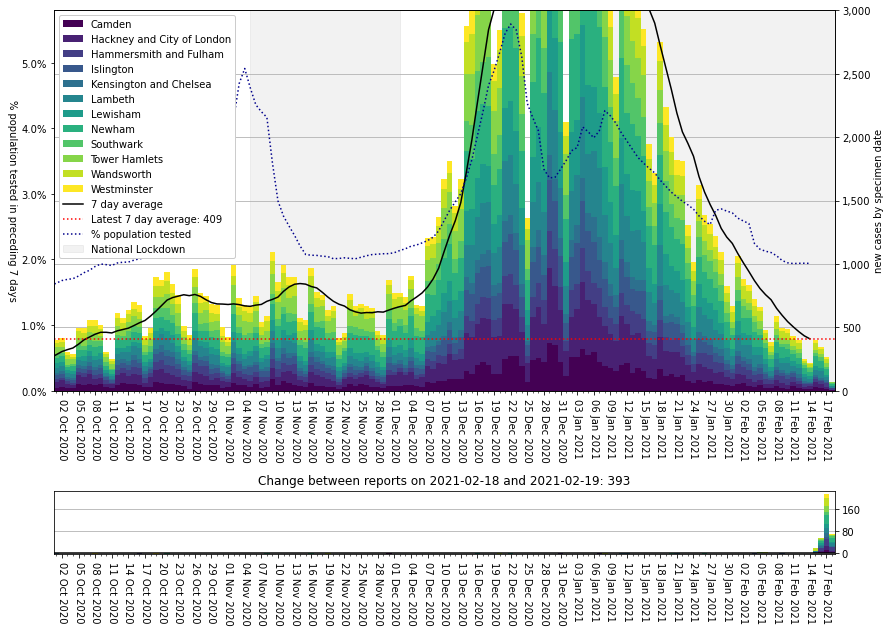

In [8]:
plot_areas(for_date, areas=london_areas, ylim=3_000)

In [9]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [10]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E07000150,Corby,283.862749,205.0,2021-02-18
E06000002,Middlesbrough,248.262165,350.0,2021-02-18
E08000028,Sandwell,227.127417,746.0,2021-02-18
E06000031,Peterborough,224.464672,454.0,2021-02-18
E07000170,Ashfield,217.326725,278.0,2021-02-18
E06000016,Leicester,215.400425,763.0,2021-02-18
E06000017,Rutland,215.393092,86.0,2021-02-18
E08000013,St. Helens,207.658443,375.0,2021-02-18
E07000236,Redditch,205.252108,175.0,2021-02-18


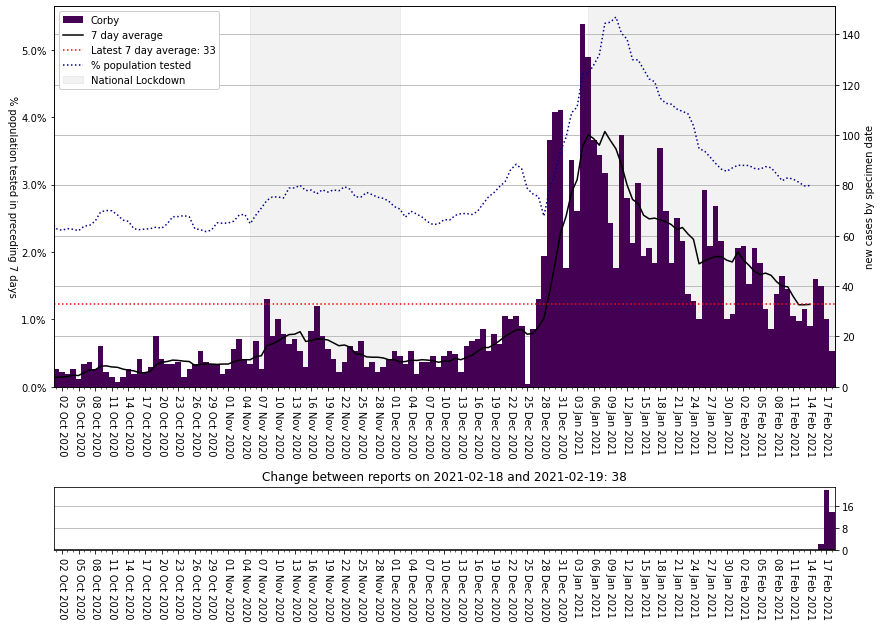

In [11]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [12]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000025,Birmingham,148.885635,1700.0,2021-02-18
E08000035,Leeds,138.941598,1102.0,2021-02-18
E08000032,Bradford,170.255810,919.0,2021-02-18
E08000003,Manchester,149.767210,828.0,2021-02-18
E06000016,Leicester,215.400425,763.0,2021-02-18
E08000028,Sandwell,227.127417,746.0,2021-02-18
S12000049,Glasgow City,115.775840,733.0,2021-02-18
E08000012,Liverpool,137.940174,687.0,2021-02-18
E08000034,Kirklees,150.300032,661.0,2021-02-18


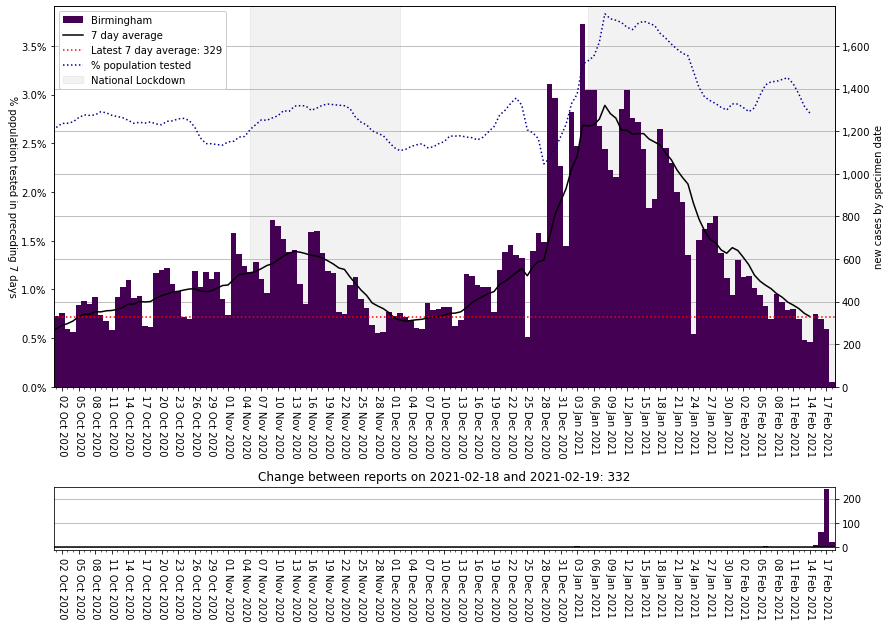

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [14]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 1.6
phe_max = 0.35

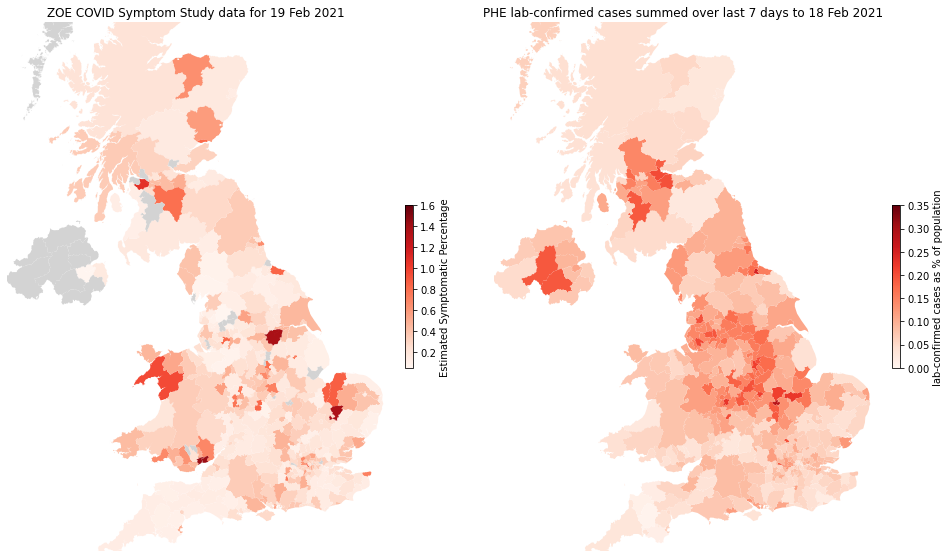

In [15]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [16]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...

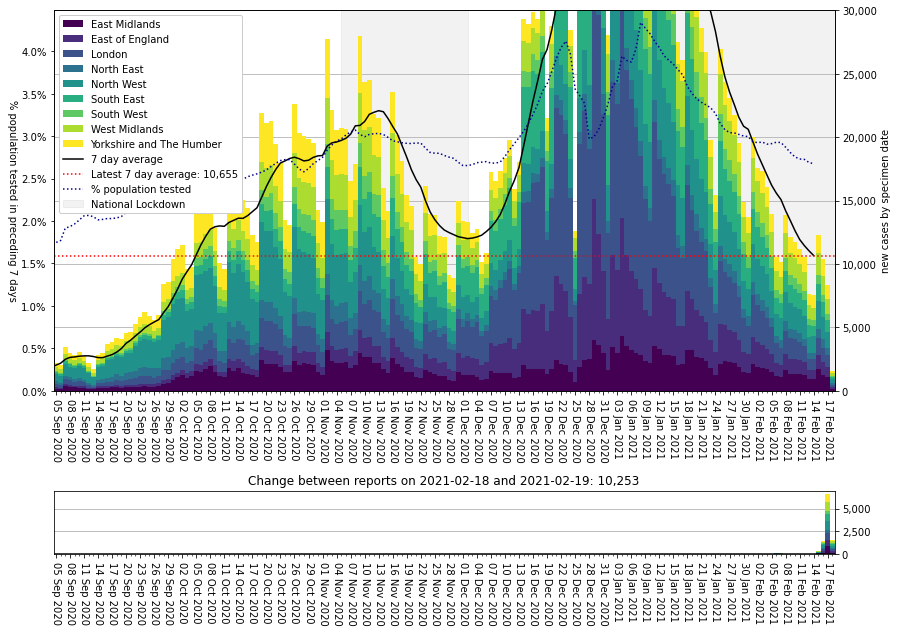

In [17]:
plot_areas(for_date, area_type=region, ylim=30_000, earliest='2020-09-05')

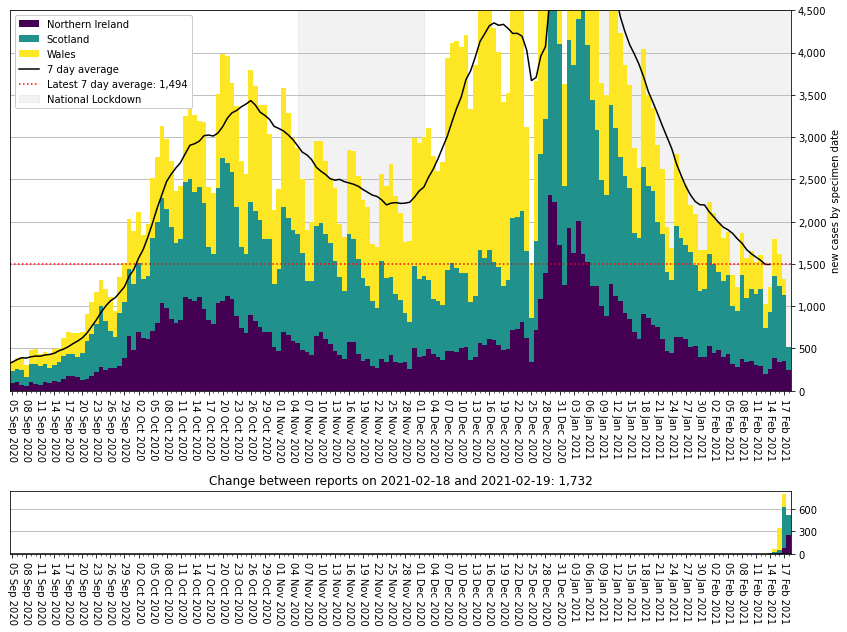

In [18]:
plot_areas(for_date, 'cases_devolved', ylim=4_500, diff_ylims=None, earliest='2020-09-05')